In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kaggle notebook display settings
pd.set_option('display.max_columns', None)

# Load the Combined Dataset

df = pd.read_csv("/kaggle/input/in-us-combined-dataset/US_IN_videos_combined.csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


Dataset Loaded Successfully!
Shape: (22658, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,USA


In [6]:
# Cleaning

# Drop duplicate video entries
df.drop_duplicates(subset=['video_id', 'country'], inplace=True)

# Drop rows where critical info is missing
df.dropna(subset=['title', 'views', 'likes', 'comment_count'], inplace=True)

# Fill missing tags/description with empty string (recommended way)
df.fillna({'tags': '', 'description': ''}, inplace=True)

print(f"Cleaned Data — Remaining Rows: {df.shape[0]}")


Cleaned Data — Remaining Rows: 22658


In [7]:

#Date-Time Processing

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

# Drop invalid timestamps
df = df.dropna(subset=['publish_time'])

# Extract new time-based columns
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_month'] = df['publish_time'].dt.month_name()

print("Added publish_hour, publish_day, publish_month columns successfully!")
df[['publish_time', 'publish_hour', 'publish_day', 'publish_month']].head()


Added publish_hour, publish_day, publish_month columns successfully!


/tmp/ipykernel_37/4132618176.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')


,publish_time,publish_hour,publish_day,publish_month
0,2017-11-13 17:13:01+00:00,17,Monday,November
1,2017-11-13 07:30:00+00:00,7,Monday,November
2,2017-11-12 19:05:24+00:00,19,Sunday,November
3,2017-11-13 11:00:04+00:00,11,Monday,November
4,2017-11-12 18:01:41+00:00,18,Sunday,November


In [9]:

#Engagement Feature Engineering

df['like_ratio'] = df['likes'] / (df['views'] + 1)
df['dislike_ratio'] = df['dislikes'] / (df['views'] + 1)
df['comment_ratio'] = df['comment_count'] / (df['views'] + 1)
df['engagement'] = (df['likes'] + df['comment_count']) / (df['views'] + 1)

# Replace infinite or missing values with 0
df.replace([np.inf, -np.inf], 0, inplace=True)
df.fillna(0, inplace=True)

print("Created engagement metrics successfully!")


Created engagement metrics successfully!


is_trending
0    0.849987
1    0.150013
Name: proportion, dtype: float64


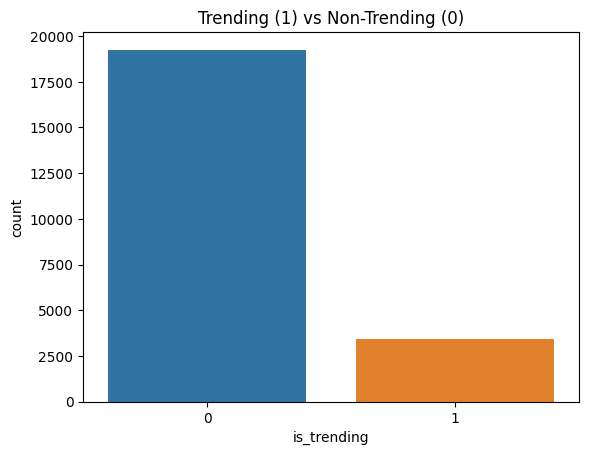

In [10]:

#Define Target Variable (is_trending)

df['is_trending'] = df.groupby('country')['views'].transform(
    lambda x: (x >= x.quantile(0.85)).astype(int)
)

print(df['is_trending'].value_counts(normalize=True))
sns.countplot(x='is_trending', data=df)
plt.title("Trending (1) vs Non-Trending (0)")
plt.show()


In [11]:
# Save Processed Data

output_path = "/kaggle/working/cleaned_youtube_data.csv"
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved at: {output_path}")


Cleaned dataset saved at: /kaggle/working/cleaned_youtube_data.csv
